In [2]:
#Importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = fetch_california_housing()
x = data.data
y= data.target

df = pd.DataFrame(x, columns=data.feature_names)
df["MEDV"] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)


In [5]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [6]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred


array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)

0.5558915986952442 0.575787706032451


C:\Users\USER\AppData\Local\Temp\ipykernel_5760\887864578.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


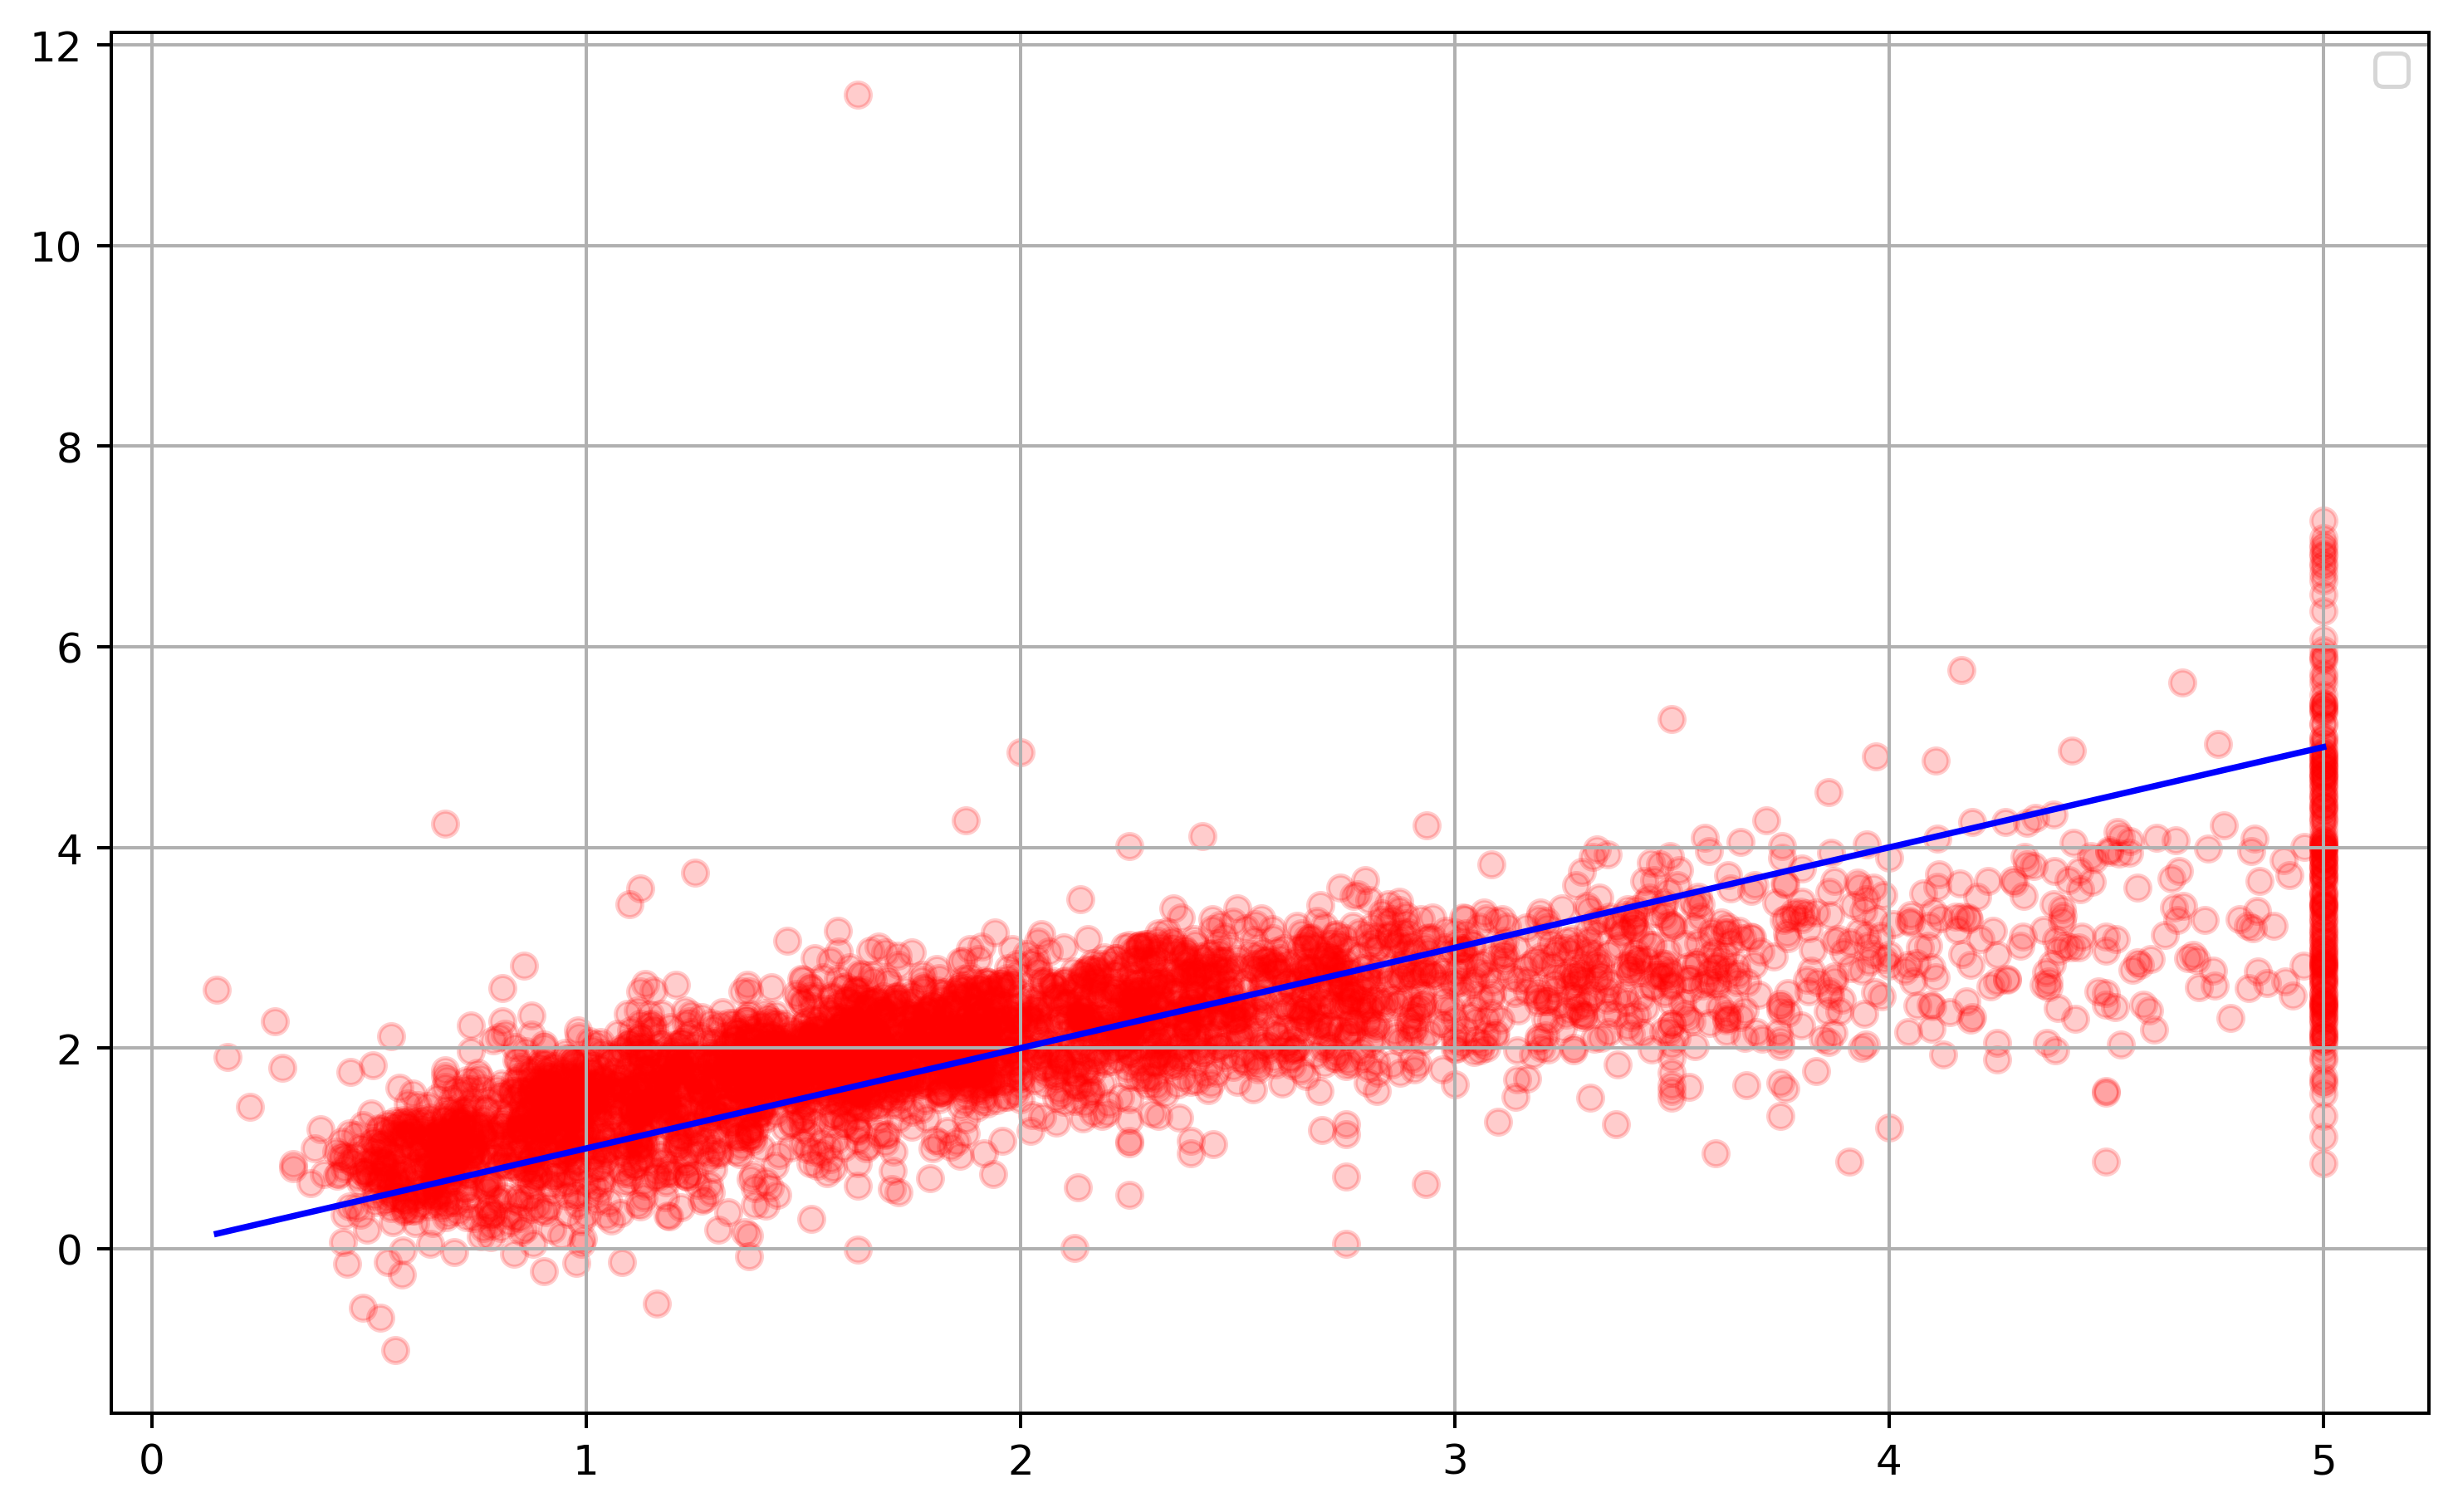

In [20]:
plt.figure(figsize=(10,6), dpi=360)
plt.scatter(y_test, y_pred, color="red", marker="o", alpha=0.2)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color="blue")
plt.grid(True)
plt.legend()
plt.show()